## Importing RTXI H5 files into Python

This Python notebook uses functions from **load_h5.py** to load RTXI data and process it into an easy-to-handle Python format. The **load_h5** module includes features to find single potentials, and save them to .csv files located at: **./data/{rtxi_filename}/{ap_label}.csv**.

If you're interested in the implementation of the functions below, open **load_h5.py**. 

Let me know if you want to make changes/additions to **load_h5.py**, so we can setup a collaborative workflow using GitHub.

#### 1. Load Functions from load_h5.py

This Jupyter Notebook is in a directory that includes a file called **load_h5.py**. The **load_h5.py** file contains a few custom functions that I wrote to process the RTXI H5 file. Below, I use Python's `import` statement in the line `from load_h5 import *` to import all the functions from **load_h5.py**. 

In [1]:
from load_h5 import * #file developed by me plot_all_channels(recorded_data)

#### 2. Set the file name and trial number

In the current directory, there should be a folder called **/data**. If you have not done so already, copy your .h5 file into this folder. Once you've done that, change the `filename` variable in the code below to:
```
filename='data/YOUR_FILE_NAME.h5'
```

Set the `trial_number` variable to an integer that corresponds to your desired trial number. If you don't know your trial number, try a few out, starting from 1 and counting up. The code below will print the tags and plot voltage/current curves for the given trial. You can adjust the `trial_number` variable until you find the data you want.

         Time    Description
0   29.855626        IK1_sf1
1   67.863612  pacing_pt5_hz
2  166.199081    pacing_1_hz
3  254.558795  pacing_pt5_hz


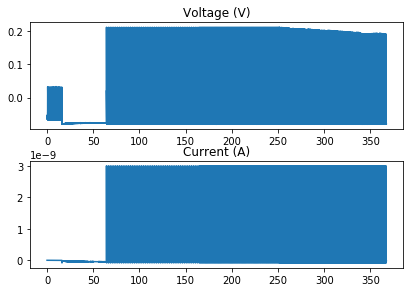

In [2]:
#Set the path and trial
filename='data/attempt_2_071519.h5'
trial_number=3
f=load_h5(filename)

recorded_data=get_exp_as_df(f,trial_number)
tags=get_tags(f,trial_number)

print(tags)
plot_V_and_I(recorded_data)

#### 3. Search for a single action potential

The code below opens a figure with Voltage and current plots. Use the magnifying glass to zoom in on the data. Once your zoomed in, you can eyeball the start and end times of an action potential. Use these times for extraction single action potential data, in the next step.

In [ ]:
%matplotlib notebook
plot_V_and_I(recorded_data)

#### 4. Plot the single action potential

Set `subsample_start` and `subsample_end` to the start and end times of your single action potential. The code will use these times to extract the single action potential data, save it to a variable called`single_ap`, and plot it.

In [ ]:
subsample_start=5.5
subsample_end=6.5
single_ap=subsample_data(recorded_data,subsample_start,subsample_end)

%matplotlib inline
plot_V_and_I(single_ap)

#### 5. Save the action potential

The code below will save the current action potential to a file with the following path:

```
./data/{RTXI_FILENAME}/sap_{NUMBER}_qq_{LABEL}.csv
```

The bracketed, all-caps words in this path may vary. So what do they mean:
- `{RTXI_FILENAME}` &mdash; automatically extracted from the original `filename` variable.
- `{NUMBER}` &mdash; automatically set based on the number of action potentials that have been saved for the given dataset. The first action potential is set to 1.
- `{LABEL}` &mdash; This is manually set by changing the `label` variable. You do not need to set `{LABEL}`. By default it is left blank. It's purpose is so the user can create some reminder for themselves.

In [ ]:
label=''
is_returned=False
save_SAP_to_csv(filename,single_ap,is_returned,label)

#### 6. Plot all action potentials

The `plot_all_aps()` function below will plot all APs that are saved to the `./data/{RTXI_FILENAME}/` folder.

In [ ]:
plot_all_aps(filename)

#### 7. Delete saved action potentials

If you want to delete the action potentials that you saved, navigate to `./data/{RTXI_FILENAME}/` and select the files you would like to delete.

#### 8. Get information on the data

The first block of code will create a DataFrame with lots of usefull information on the entire data set. If you've already run this code on the current data set, you can lode the dataframe with the second block of code. The data table will be saved to the variable `everything`.

In [33]:
everything = get_everything(recorded_data)

In [9]:
everything = load_everything_dataframe('data/sap_summary_data.csv')

#### 9. Get classes

After creating the data table, you can use it to find what kinds of action potentials are in your data. The code below will tell you how many APs of each class are in your data.

In [37]:
class_tags = get_class_tags(everything, True)

16 spontaneous action potentials
50 non_spontaneous_0.5_Hz action potentials
86 non_spontaneous_1.0_Hz action potentials
1 non_spontaneous_1.2_Hz action potential
231 non_spontaneous_2.0_Hz action potentials


#### 9. Get all single action potentials

If you already have the data table with information on every action potential, you can quickly get a list of the DataFrame of every action potential with the first code block below. If you haven't ran the above code, you can still get this list with the `get_all_saps` function. The list will be saved to the variable `all_saps`.

In [4]:
ap_data = recorded_data
data_table = everything
all_saps = get_saps_from_data_table(ap_data, data_table)

In [ ]:
all_saps = get_all_saps(recorded_data)

#### 10. Find single action potentials

The code below will find single action potentials for you and save them to the variable `sap` based on their location in the data. Set `ap_number` to the index of the action potential you would like to find. If you want the function to find a random action potential from anywhere in the data, set `ap_number` to `0`. If you want the function to plot the action potential, set `does_plot` to `True`.

In [ ]:
ap_number = 2
does_plot = True
sap = get_single_ap(recorded_data, ap_number, does_plot)

#### 11. Plot all single action potentials

This function below will create an interactive plot with a slider. Set `ap_data` to the data it will plot. It can work with either the initial DataFrame, but it will work faster if you run `get_all_saps` first and plug in `all_aps`. Move the slider to plot different action potentials in the data.

In [ ]:
ap_data = all_saps
plot_sap_slider(ap_data)

#### 12. Smoothing single action potential data

This code will smooth out the voltage in a dataframe with one action potential, and creaete a new dataframe called `smooth_ap`. Set `single_ap_data` to the dataframe you want it to smooth. The higher the `degree`, the smoother the end result will be. Set `does_plot` to `False` if you don't want it to plot the new dataframe.

In [ ]:
degree = 100
single_ap_data = sap
does_plot = True
smooth_ap = smooth_ap_data(single_ap_data, degree, does_plot)

#### 13. Comparing two action potentials

The code below will give you the amplitude and duration of two action potentials, and graph those action potentials beow. Set `first_ap` and `second_ap` to the two action potentials you would like to compare.

In [ ]:
first_ap = sap
second_ap = smooth_ap
compare_aps(first_ap, second_ap)

#### 14. Find the duration of action potentials

This function finds the duration of a single action potential, and saves it to `apd`. To use it, set `single_ap_data` to the action potential data you want it to find the duration of. Set `depolarization_percent` and `repolarization_percent` to the percentages (in decimals) you want the duration to be measured from. If you don't want the function to plot the action potential and it's duration, set `does_plot` to `False`.

In [ ]:
depolarization_percent = .5
repolarization_percent = .9
does_plot = True
single_ap_data = sap
apd = get_ap_duration(single_ap_data, depolarization_percent, repolarization_percent, does_plot)

#### 15. Find the amplitude of action potentials


This function finds the amplitude of a single action potential, and saves it to `apa`. To use it, set `single_ap_data` to the action potential data you want it to find the amplitude of. If you don't want the function to plot the action potential and it's amplitude, set `does_plot` to `False`.

In [ ]:
single_ap_data = sap
does_plot = True
apa = get_ap_amplitude(single_ap_data, does_plot)

#### 16. Find the shape factor of action potentials

The code below finds the shape factor of an action potential and records it to `shape_factor`. Set `single_ap_data` to the action potential you want the shape factor of. If you don't want the function to plot the action potential and it's shape factor, set `does_plot` to `False`.

In [ ]:
single_ap_data = sap
does_plot = True
shape_factor = get_ap_shape_factor(single_ap_data, does_plot)

#### 17. Find the maximum increase velocity of an action potential

This function below will find the maximum increase velocity of an action potential and save it to the variable `vmax`. Set `single_ap_data` to the single action potential it will find the maximum velocity of. If you don't want the function to plot the action potential and it's maximum increase velocity, set `does_plot` to `False`.

In [ ]:
single_ap_data = sap
does_plot = True
vmax = get_slope(single_ap_data, does_plot)

#### 18. Find all cycle lengths

The code below will search through the entire data set and create a list called `cycle_lengths` of all the cycle lengths of the action potentials. If you don't want it to make a graph of the cycle lengths, set `does_plot` to `False`.

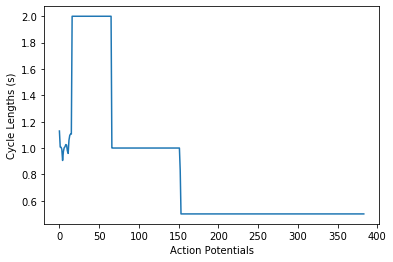

In [19]:
does_plot = True
cycle_lengths = get_cycle_lengths(recorded_data, does_plot)

#### 19. Find all action potential durations

This code will search through all of the data and make a list called `all_apds` of the duration of every action potential. Set `depolarization_percent` and `repolarization_percent` to the percentages (in decimals) you want the duration to be measured from. If you want a graph of the durations, set `does_plot` to `True`. You need to run `get_all_saps` before you run this function.

In [ ]:
depolarization_percent = .5
repolarization_percent = .9
does_plot = True
all_apds = get_all_apds(all_saps, depolarization_percent, repolarization_percent, True)

#### 20. Get APDn - APDn+1

The code below will create a list called `apdn_apdn1` of all the action potential durations compared to the following action potential duration. Set `depolarization_percent` and `repolarization_percent` to the percentages (in decimals) you want the duration to be measured from. If you want a graph of the durations, set `does_plot` to `True`. You need to run `get_all_saps` before you run this function.

In [ ]:
depolarization_percent = .5
repolarization_percent = .9
does_plot = True
apdn_apdn1 = get_apdn_apdn1(all_saps, depolarization_percent, repolarization_percent, does_plot)

#### 21. Find all action potential amplitudes

This code will search through all of the data and make a list called `all_apas` of the amplitude of every action potential. If you want a graph of the amplitudes, set `does_plot` to `True`. You need to run `get_all_saps` before this function.

In [ ]:
does_plot = True
all_apas = get_all_apas(all_saps, does_plot)

#### 22. Find all action potential shape factors

This code will search through all of the data and make a list called `all_sfs` of the shape factor of every action potential. If you want a graph of the shape factors, set `does_plot` to `True`. You need to run `get_all_saps` before this function.

In [ ]:
does_plot = True
all_sfs = get_all_sfs(all_saps, does_plot)

#### 23. Find all action potential maximum increase velocities

This code will search through all of the data and make a list called `all_vmax` of the maximum increase velocity of every action potential. If you want a graph of the velocities, set `does_plot` to `True`. You need to run `get_all_saps` before this function.

In [ ]:
does_plot = True
all_vmax = get_all_vmax(all_saps, does_plot)

#### 24. Get all diastolic intervals

This code below will find the diastolic intervals of every non-spontaneous action potential, and them to a list `di`. For spontaneous action potentials, the function will return `'NA'`.
If you want a plot of the diastolic intervals, set `does_plot` to `True`.

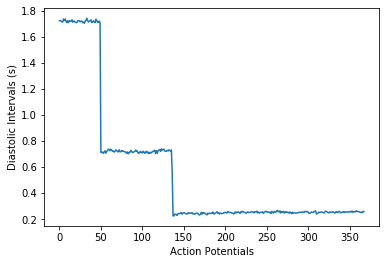

In [30]:
does_plot = True
di = get_diastolic_intervals(recorded_data, does_plot)

#### 25. Find a range of action potentials

The code below will find a range of single action potentials for you and save it to the variable `ap_range`. To have the function return a list of single action potential Dataframes, set `split` to `True`. If you want one Dataframe containing all the action potentials in the range, set `split` to `False`. Set `first_ap` to the index of the first action potential in the range, and set `last_ap` to the last action potential you want in the range. If you don't want the function to plot the action potentials, set `does_plot` to `False`.

In [ ]:
split = False
first_ap = 17
last_ap = 20
does_plot = True
ap_range = get_ap_range(recorded_data, first_ap, last_ap, split, does_plot)

#### 26. Find various action potentials

The following code will find five various action potentials from different parts of the data, and save them all to the variable `vaps`. If you don't want it to plot the five action potentials, set `does_plot` to `False`.

In [ ]:
does_plot = True
vaps = get_various_aps(recorded_data, does_plot)

restitution curve

In [ ]:
def do_the_thing(ap_data, peak):
    cycle_length = len(ap_data)
    smoothed = np.convolve(ap_data['Voltage (V)'], np.ones((50,))/50, mode='valid')
    slope = np.convolve(np.diff(smoothed), np.ones((50,))/50, mode='valid')
    time_start = ap_data['Time (s)'].min()
    time_start_loc = ap_data['Time (s)'].idxmin()
    start = peak - int(cycle_length / 5) - int(time_start_loc)
    end = peak - int(cycle_length / 10) - int(time_start_loc)
    before_upslope = slope[start:end]
    print(np.average(before_upslope))
    plt.plot(before_upslope)

ap = 379
sap1 = get_single_ap(recorded_data, ap + 1)
sap2 = get_single_ap(recorded_data, ap)
sap3 = get_single_ap(recorded_data, ap + 2)
peaks = find_voltage_peaks(recorded_data['Voltage (V)'])
do_the_thing(sap1, peaks[ap])
do_the_thing(sap2, peaks[ap - 1])
do_the_thing(sap3, peaks[ap + 1])

In [ ]:
N = 50

x = np.convolve(sap['Voltage (V)'], np.ones((N,))/N, mode='valid')
plt.plot(x)

In [35]:
print(everything)

       Start      End                   Class  Cycle Lengths (s)  \
0       3986    14308             spontaneous             1.1292   
1      15582    25600             spontaneous             1.0078   
2      25662    35678             spontaneous             1.0070   
3      35771    45748             spontaneous             0.9914   
4      45899    55662             spontaneous             0.9057   
..       ...      ...                     ...                ...   
379  3640522  3645522  non_spontaneous_2.0_Hz             0.5001   
380  3645523  3650523  non_spontaneous_2.0_Hz             0.5001   
381  3650524  3655524  non_spontaneous_2.0_Hz             0.5001   
382  3655525  3660525  non_spontaneous_2.0_Hz             0.5001   
383  3660526  3665526  non_spontaneous_2.0_Hz             0.5001   

    Diastolic Intervals pre-AP (s)  Duration 30% (s)  Duration 40% (s)  \
0                               NA            0.1430            0.1665   
1                               NA 